### Vehicle Insurance Customer Data
3251_Project_Group2

##### Customers’ Demographic Factors:

- State of Living - Customer’s state of residency  
- Education - Customer’s education level (High School or below/ College/ Bachelor/ Master/Doctor)
- Employment Status - Customer’s employment status (Employed/Unemployed/Retired/Medical Leave/Disabled)
- Gender - Customer Gender (Male/Female)
- Income - Customer per annum income
- Marital Status - Customer marital status (Single/Married/Divorced)
- Location Code - Customer living location type (Rural/Urban/Suburban)


##### Insurance Policy Factors:

- Coverage Type - Customer’s vehicle insurance coverage type (Basic/ Extended/ Premium)
- Policy Type - Type of policy provided to the customer (Corporate Auto/ Personal Auto/ Special Auto)
- Policy Subtype - Sub categories of the policy type provided to the customer
- Sales Channel - Type of sales channel through which the insurance coverage policy was provided to the customer (Agent/Branch/Call Center/ Web)
- Number of Policies - Number of policies holding by a customer
- Policy Effective to Date - Insurance effective date
- Monthly Premium Auto - The amount paid by customers to an insurance company for active coverage
- Months Since Policy Inception - Months since policy began
- Total Claim Amount - The amount claimed by the customer
- Months Since Last Claim - Number months passed since the last claim made by a customer
- Number of Open Complaints - Number of active complaints that are opened by customer
- Direct Marketing Campaign Response - Response received through marketing campaign (Yes/No)
- Renew Offer Type - Offer type renewed for customer
- Vehicle Class - Type of vehicle (Four-Door Car/ Two-Door Car/SUV/Luxury SUV/Sports Car/ Luxury Car)
- Vehicle Size - Size of vehicle (Large/Midsize/Small)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#JG added:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
#import category_encoders as ce
from patsy import dmatrices
import scipy as sp
from statsmodels.stats.outliers_influence import variance_inflation_factor

names = ['customer', 'state', 'clv', 'response', 'coverage_type', 'education', 'effective_to_date', 'employment_status', 'gender', 'income' , 'location_code', 'marital_status', 'monthly_premium', 'months_since_last_claim', 'months_since_policy_start', 'open_complaints', 'num_policies', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size']
insurance= pd.read_csv('https://raw.githubusercontent.com/jgoodz8/3251_Project_Group2/master/AutoInsurance.csv',\
            sep=",",header=0,names=names)

insurance['clv']=insurance['clv'].round(2)

insurance['effective_to_date'] = pd.to_datetime(insurance['effective_to_date'])


insurance['total_claim_amount'] = insurance['total_claim_amount'].round(2)




# 1.0 Visualizations

#### 1.01 Heatmap
Showcases the correlation between the numeric variables

Text(0.5, 1.05, 'Insurance Attributes Correlation Heatmap')

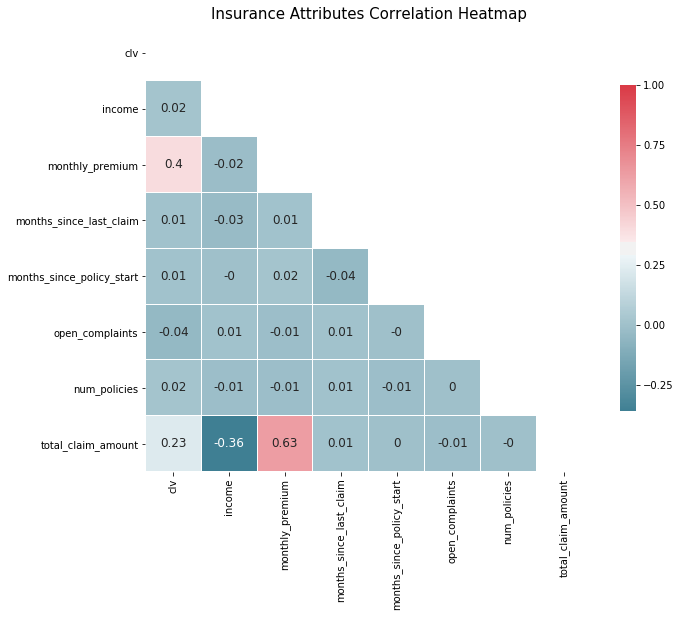

In [2]:

corr = insurance.corr()
    
_ , ax = plt.subplots(figsize =(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
    
_ = sns.heatmap(round(corr,2), 
                cmap = colormap,
                square=True, 
                cbar_kws={'shrink':.6 }, 
                ax=ax,
                annot=True, 
                linewidths=0.1,vmax=1.0, linecolor='white',
                annot_kws={'fontsize':12 },
                mask=mask)
    
plt.title('Insurance Attributes Correlation Heatmap', y=1.05, size=15)

#### Conclusion:
- Monthly premium has a strong positive correlation with the monthly premium
- Income has a negative correlation with the total claim amount

#### 1.02 Total Customer Lifetime value

In [3]:
fig = go.Figure(data=go.Choropleth(
    locations=["AZ","CA","NV","OR" ,"WA"], # Spatial coordinates
    z = insurance.groupby(['state']).sum()['clv'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = 'Total Customer Life Value By State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

#### Conclusion:
- Only States from the West Coast are included in the Data.
- Customers from California provide the most amount business to the company (around $25 million).   

- Customers from Washington provide the least amount of business to the company (around $6.4 million)

#### 1.03 Total Claim amount by location
Visualize the total value of the claims made by the location type 

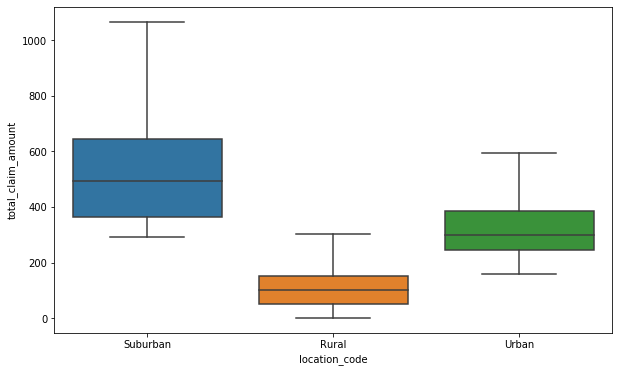

In [4]:
plt.figure(figsize=(10,6))
sns.boxplot(x='location_code',y='total_claim_amount',data=insurance,showfliers=False)
plt.show()

#### Conclusion:
From this we can conclude the following:
1. Suburban insurance policies have the highest claim amounts with a median value of ~ $500.  

2. Rural locations have the lowest claim amounts with a median value of ~ $100.

3. There exists a stark difference $400 between Rural and suburban insurance customers.

#### 1.04 Average claim by State

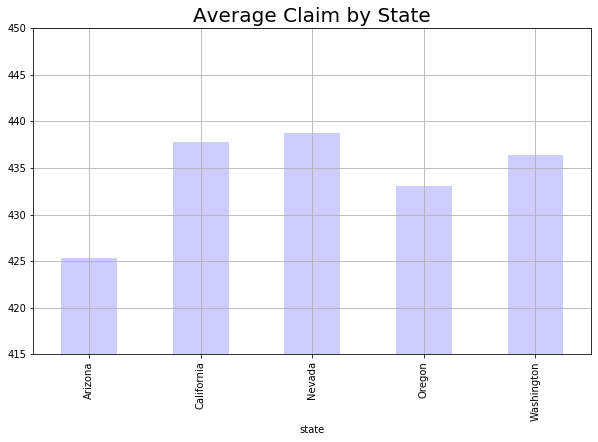

In [5]:
plt.figure(figsize=(10,6))
state=insurance.groupby(['state'])['total_claim_amount'].mean()
state.plot(kind='bar',ylim=(415,450),color='b',alpha=0.2)
plt.title("Average Claim by State",fontsize=20)
plt.grid('True')
plt.show()

#### 1.05 Customer Lifetime Value vs Claim amount

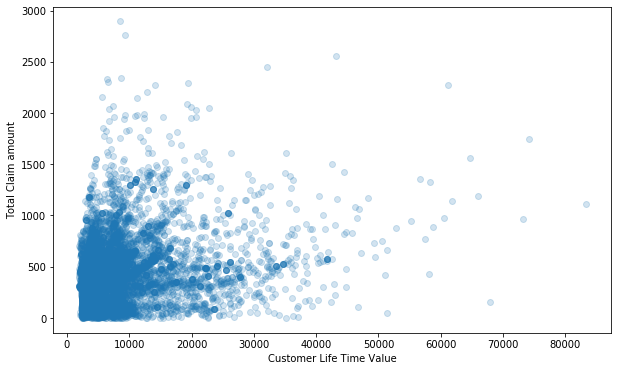

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(insurance['clv'], insurance['total_claim_amount'],alpha=0.2)
plt.xlabel('Customer Life Time Value')
plt.ylabel('Total Claim amount')
plt.show()

#### 1.06 Total Customer Lifetime Value and Claim amount by State

In [7]:
customerState = insurance.groupby(['state'])['clv','total_claim_amount'].sum()
customerState['state']=customerState.index.values

fig = px.scatter(customerState, x=customerState['total_claim_amount'], y=customerState['clv'], size=customerState['clv'], color=customerState['state'], hover_name=customerState['state'], size_max=60)
fig.show()


#### 1.07: Customer income vs claim amount

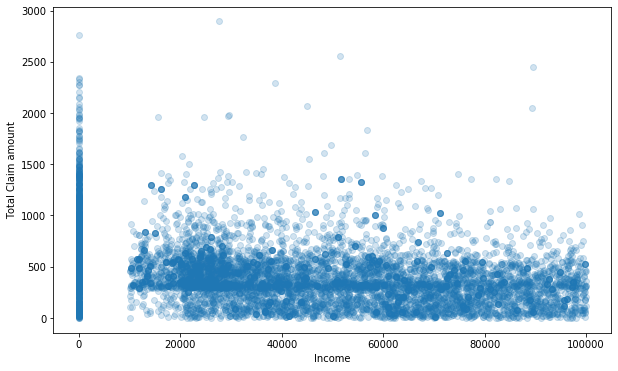

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(insurance['income'], insurance['total_claim_amount'],alpha= 0.2)
plt.xlabel('Income')
plt.ylabel('Total Claim amount')

plt.show()

#### Conclusion:
- People with zero declared income have higher claim amounts.
- No trend can be seen between income and total claim amounts`

#### 1.08 Monthly premium vs Total claim amount

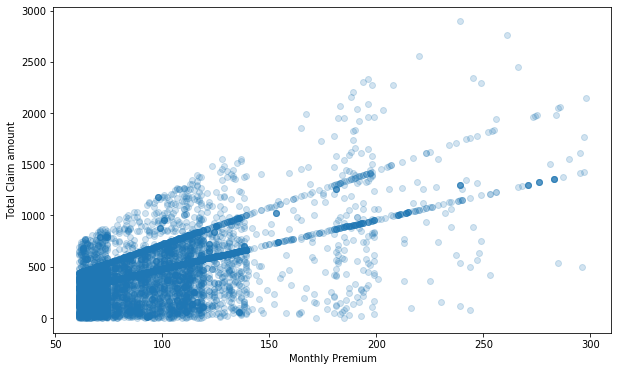

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(insurance['monthly_premium'], insurance['total_claim_amount'],alpha=0.2)
plt.xlabel('Monthly Premium')
plt.ylabel('Total Claim amount')

plt.show()

#### Conclusion:
- A positive trend can be seen, a higher monthly premium results in a higher total claim amount

#### 1.09 Education vs Total claim amount

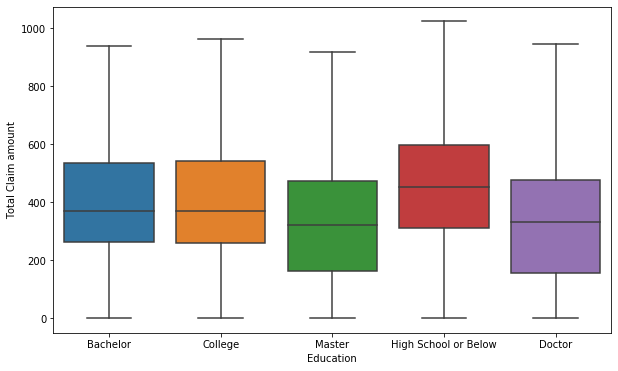

In [10]:
#Education

plt.figure(figsize=(10,6))
sns.boxplot(x='education', y= 'total_claim_amount', data= insurance,showfliers=False)
plt.xlabel('Education')
plt.ylabel('Total Claim amount')

plt.show()



#### Conclusion:
- Customers with a high school education tend to have higher claim amounts.
- Customers with Doctorates and Masters tend to have the lower claim amounts.

#### 1.10 Open complaints vs Total claim amounts

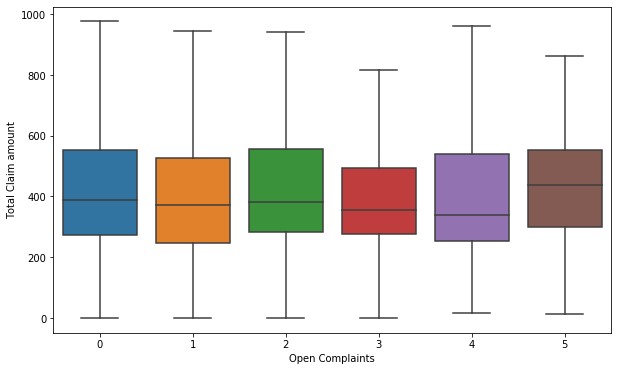

In [11]:
#Education

plt.figure(figsize=(10,6))
sns.boxplot(x='open_complaints', y= 'total_claim_amount', data= insurance,showfliers=False)
plt.xlabel('Open Complaints')
plt.ylabel('Total Claim amount')

plt.show()



#### 1.11 Coverage type vs claim amount

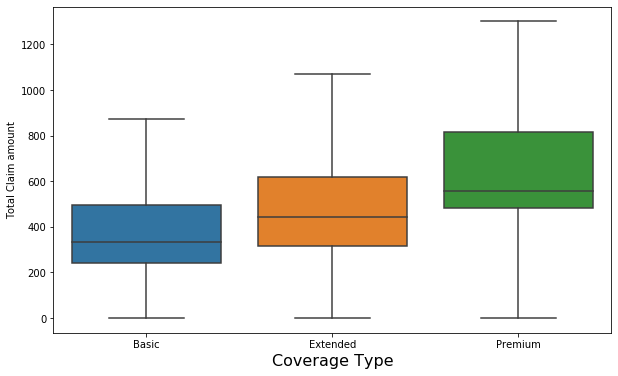

In [12]:

plt.figure(figsize=(10,6))
sns.boxplot(x='coverage_type', y= 'total_claim_amount', data= insurance,showfliers=False)
plt.xlabel('Coverage Type',fontsize=16)
plt.ylabel('Total Claim amount')

plt.show()



#### Conclusion:
- The better the the coverage, the higher the claim amount

#### 1.12 Gender and claim amounts

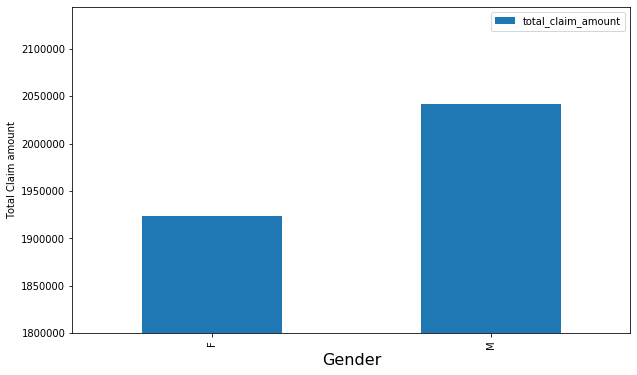

In [13]:
#Gender - Total claims by male is slightly higher than claims by female
gender = pd.DataFrame(insurance.groupby(['gender'])['total_claim_amount'].sum())

gender.plot(kind='bar',ylim=1800000,figsize=(10,6))

plt.xlabel('Gender',fontsize=16)
plt.ylabel('Total Claim amount')

plt.show()

#### Conclusion:
- Men tend to have higher claim amounts compared to women

#### 1.13 Customer Lifetime value comparisons

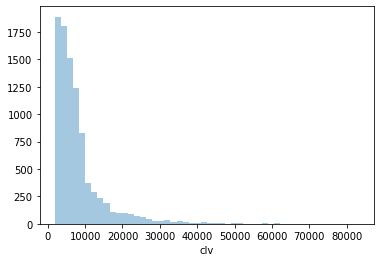

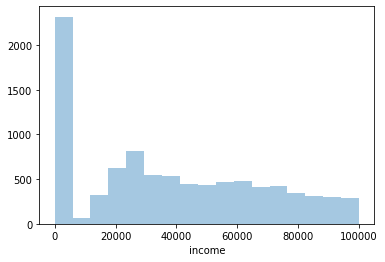

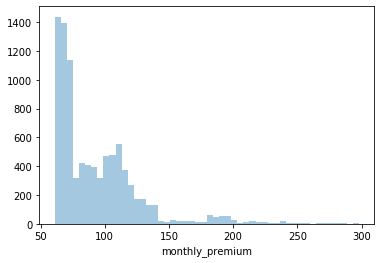

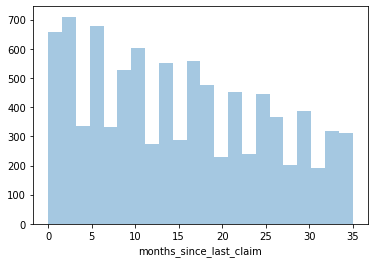

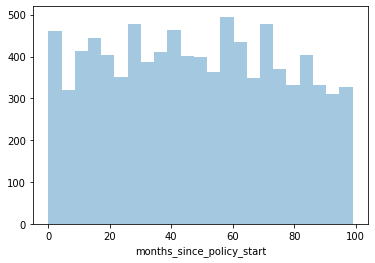

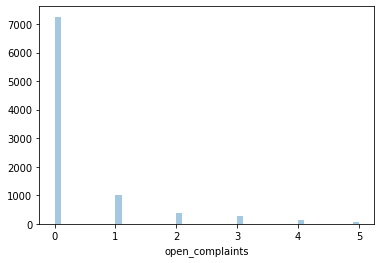

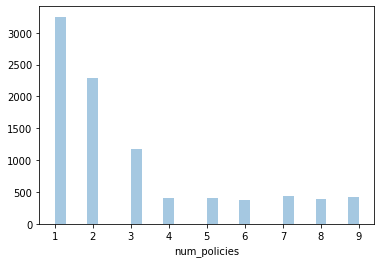

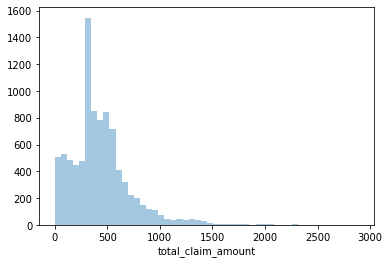

In [14]:
insurance_cont = insurance.select_dtypes([np.int64, np.float])

for col in insurance_cont.columns:
    p = sns.distplot(insurance[col], kde = False)
    plt.show()

#### 1.14 Boxplots

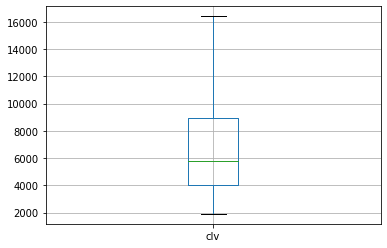

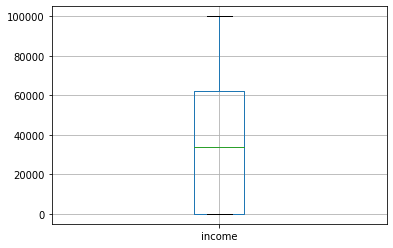

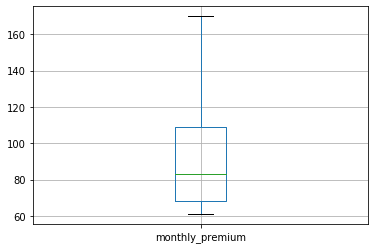

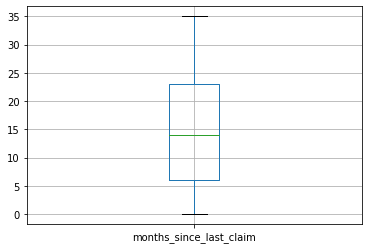

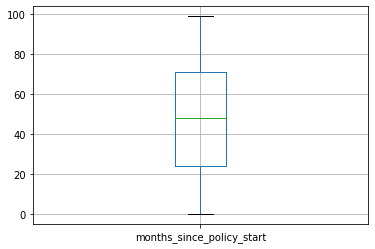

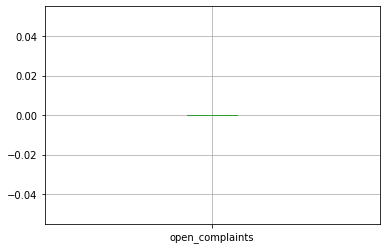

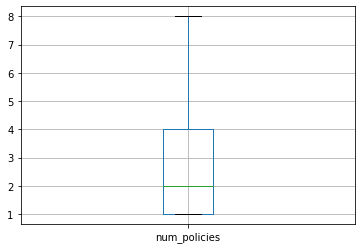

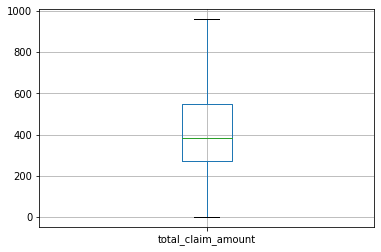

In [15]:
for i in insurance_cont.columns:
    insurance_cont.boxplot(column=i,showfliers=False)
    plt.show()

#### 1.15 Distribution of customers across various categories

Text(0.5, 1.0, 'Education')

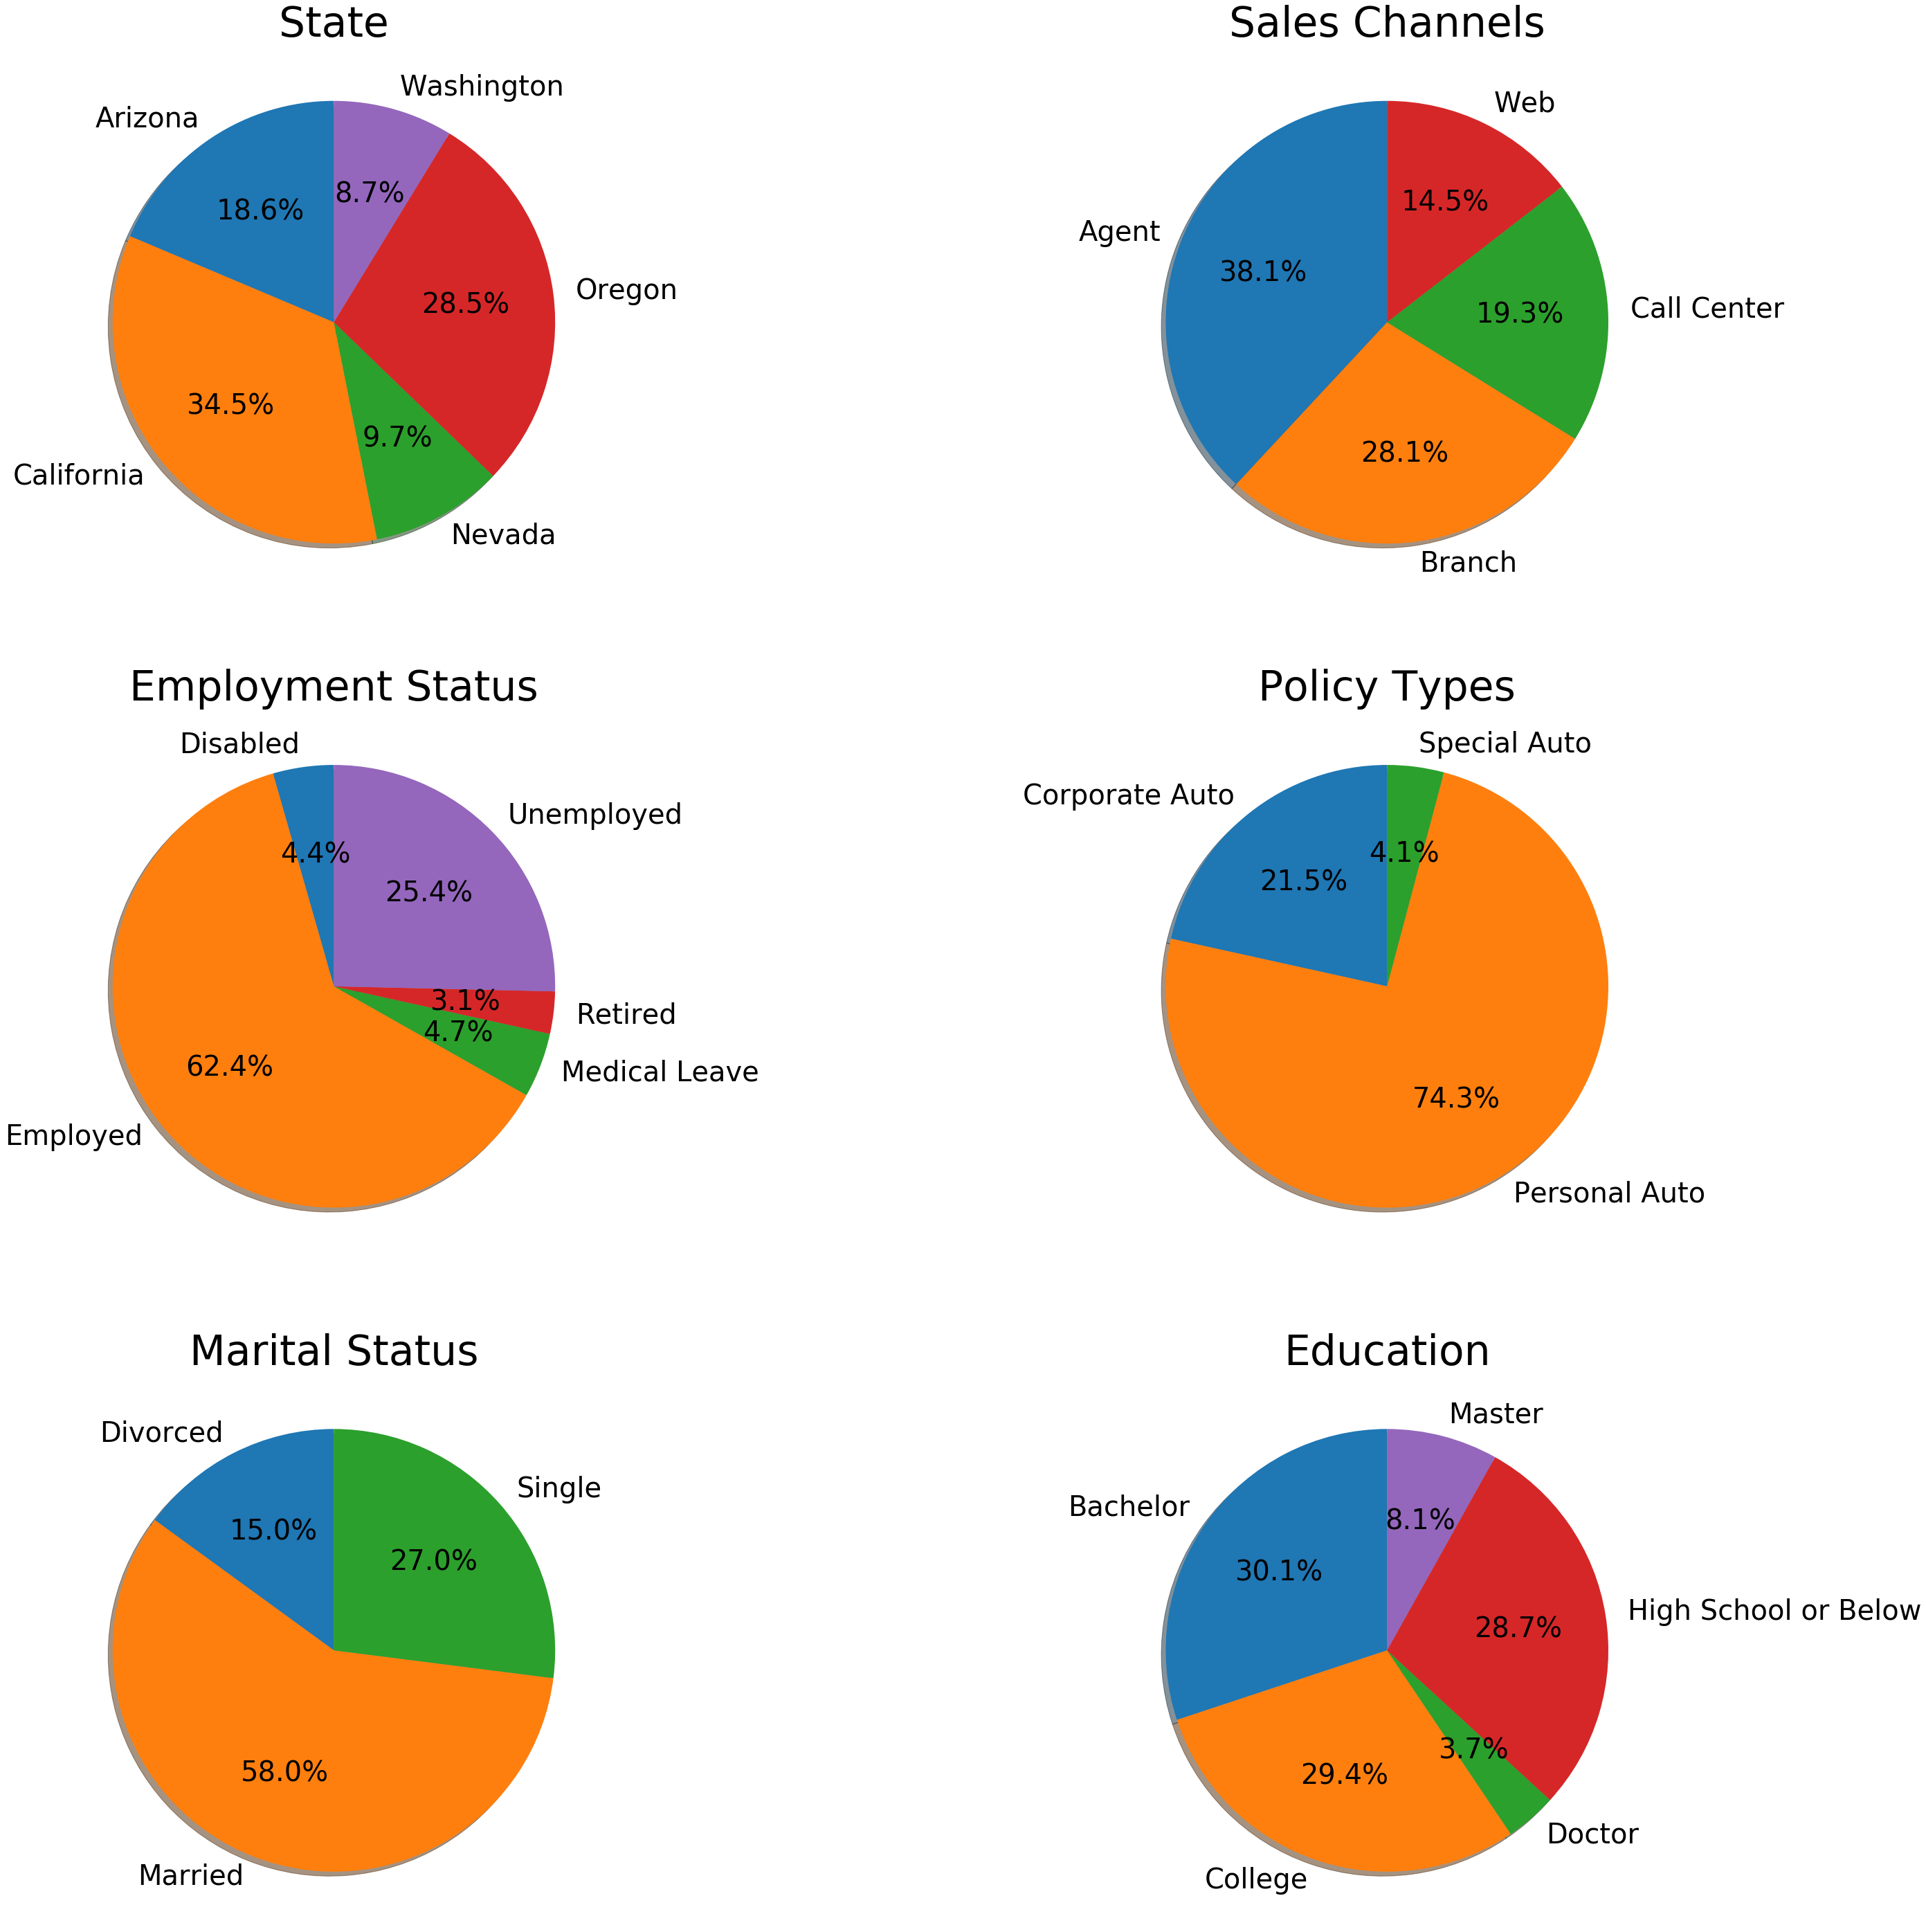

In [16]:
fig, ax = plt.subplots(3,2,figsize=(50,50))
#Customers across state
customersByState = insurance.groupby(['state'])['customer'].count()
ax[0,0].pie(customersByState, labels=customerState.index.values, autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 40})
ax[0,0].set_title("State",fontsize=60)

#Customers by sales_channel
customersBySalesChannel = insurance.groupby(['sales_channel'])['customer'].count()
ax[0,1].pie(customersBySalesChannel, labels=customersBySalesChannel.index.values, autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 40})
ax[0,1].set_title("Sales Channels",fontsize=60)

#Customers by employment status
customersByEmploymentStatus = insurance.groupby(['employment_status'])['customer'].count()
ax[1,0].pie(customersByEmploymentStatus, labels=customersByEmploymentStatus.index.values, autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 40})
ax[1,0].set_title("Employment Status",fontsize=60)

#Customers by policy_type
customersByPolicyType = insurance.groupby(['policy_type'])['customer'].count()
ax[1,1].pie(customersByPolicyType, labels=customersByPolicyType.index.values, autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 40})
ax[1,1].set_title("Policy Types",fontsize=60)

#Customers by marital_status
customersByMaritalStatus = insurance.groupby(['marital_status'])['customer'].count()
ax[2,0].pie(customersByMaritalStatus, labels=customersByMaritalStatus.index.values, autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 40})
ax[2,0].set_title("Marital Status",fontsize=60)

#Customers by education
customersByEducation = insurance.groupby(['education'])['customer'].count()
ax[2,1].pie(customersByEducation, labels=customersByEducation.index.values, autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 40})
ax[2,1].set_title("Education",fontsize=60)


#### 1.16 Comparison

/Applications/Python3.7/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Applications/Python3.7/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/Applications/Python3.7/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Applications/Python3.7/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `h

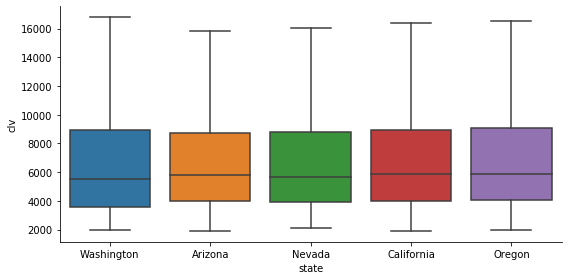

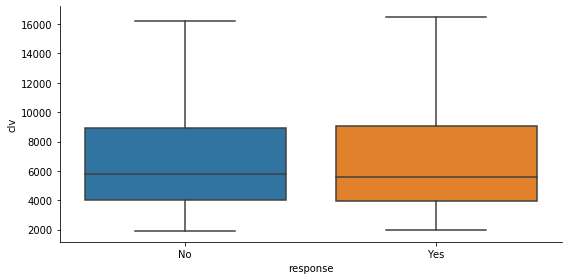

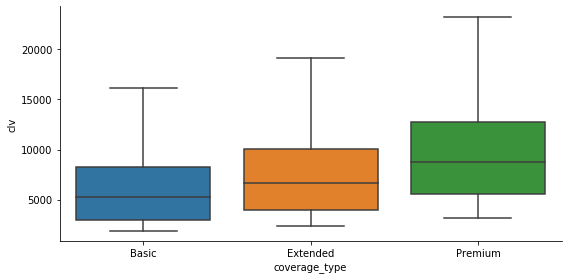

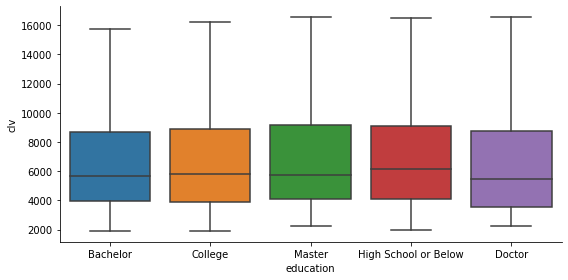

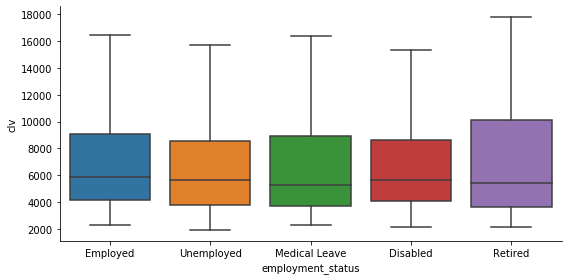

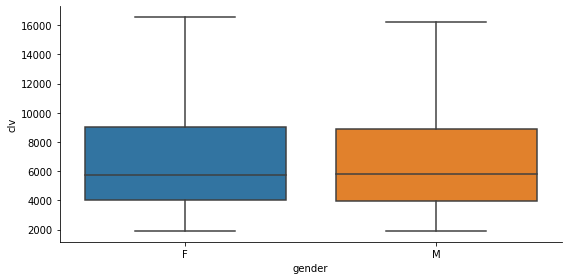

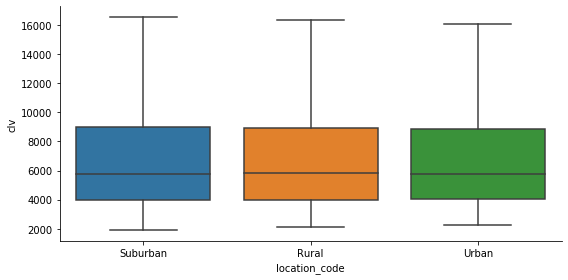

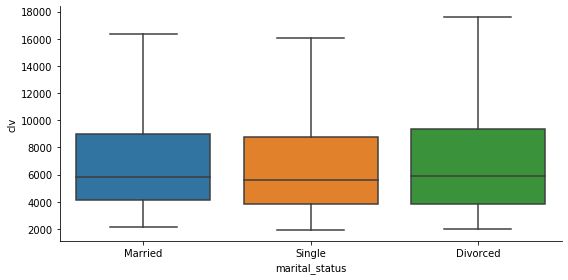

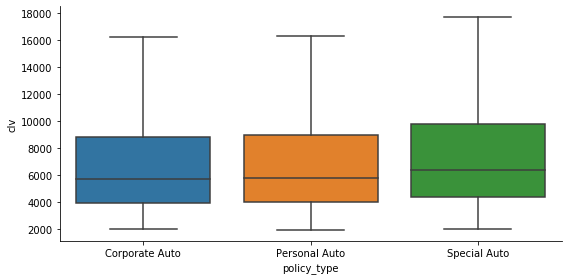

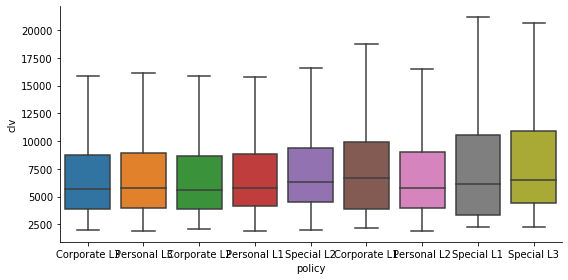

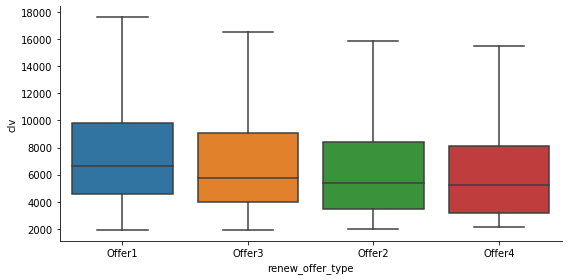

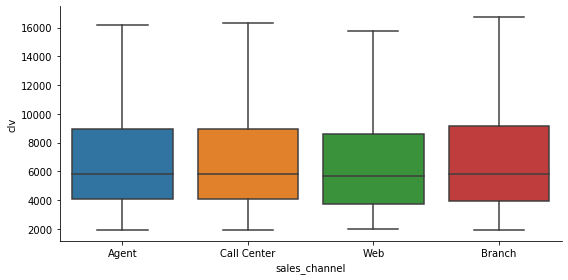

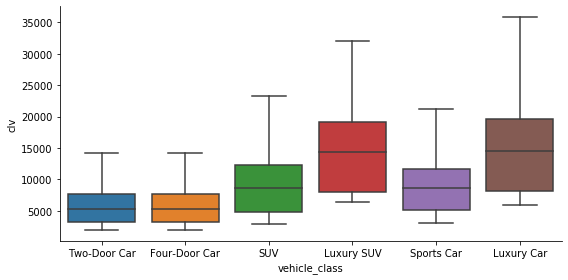

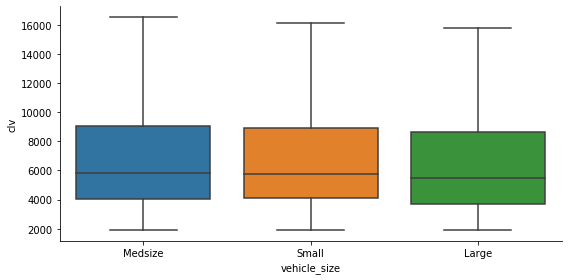

In [17]:
insurance_cat = insurance.select_dtypes([np.object]).drop(columns='customer')
for col in insurance_cat.columns:
    sns.factorplot(x = col, y = 'clv', kind = 'box', data = insurance, size=4, aspect=2,showfliers=False)

/Applications/Python3.7/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Applications/Python3.7/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



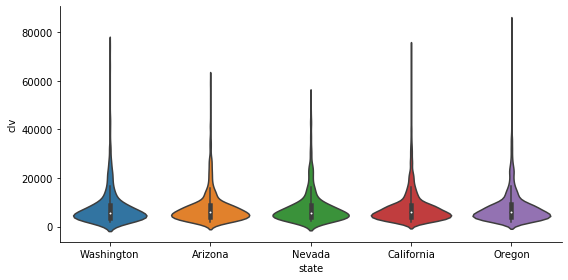

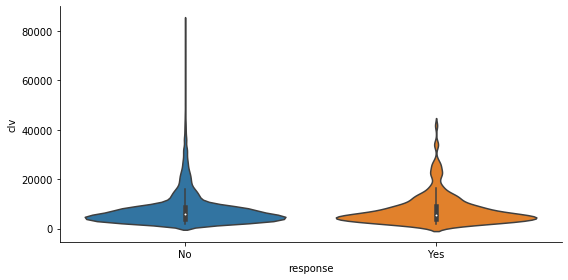

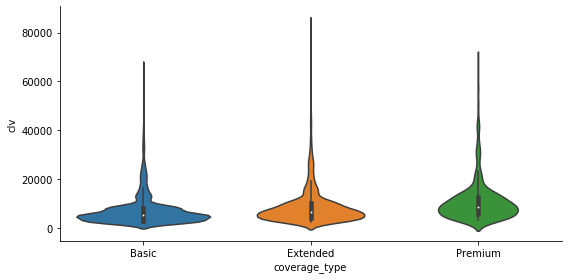

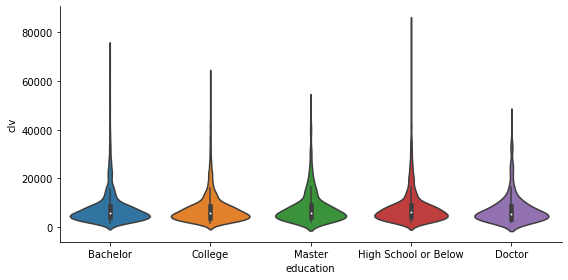

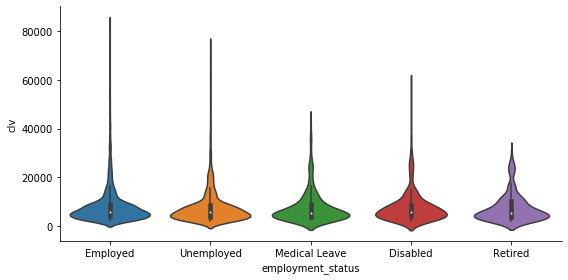

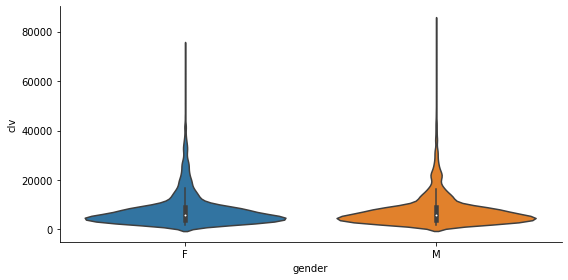

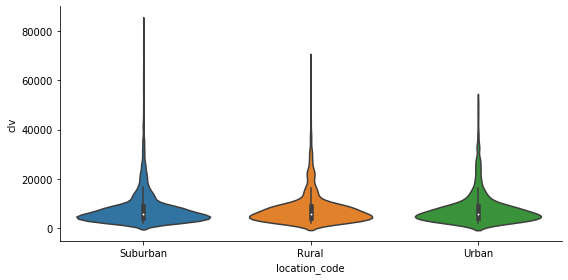

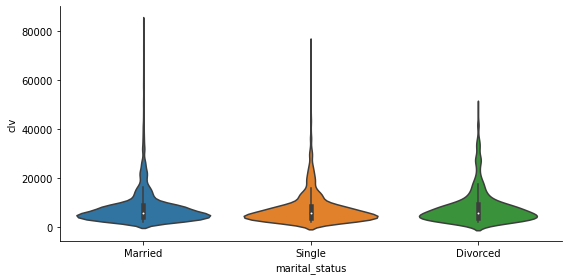

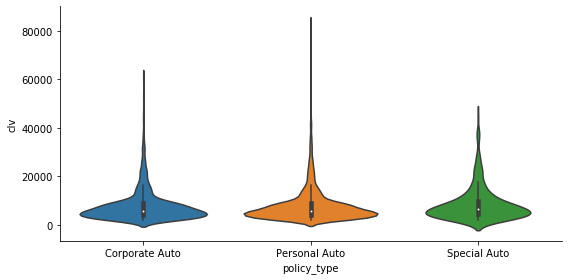

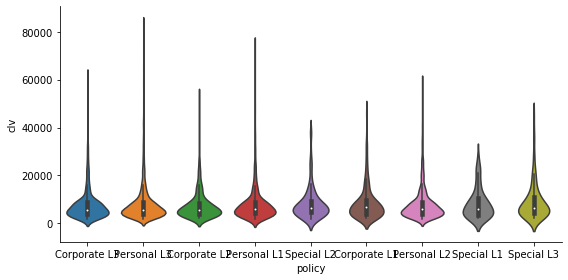

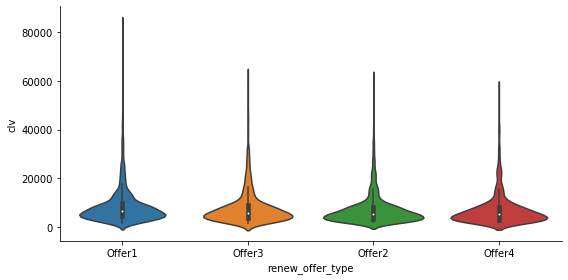

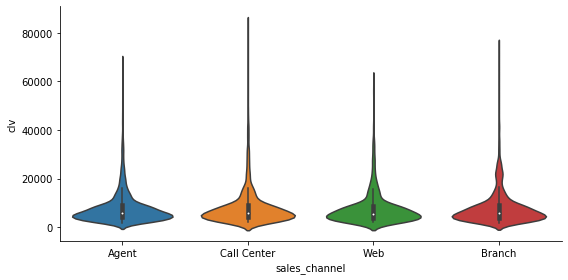

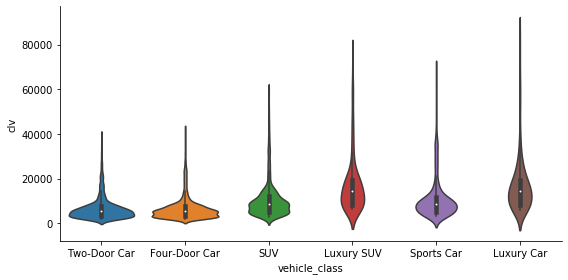

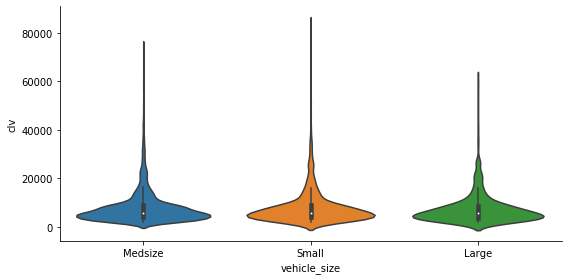

In [18]:
for col in insurance_cat.columns:
    sns.factorplot(x = col, y = 'clv', kind = 'violin', data = insurance, size=4, aspect=2,showfliers=False)

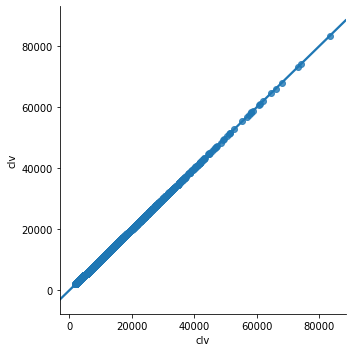

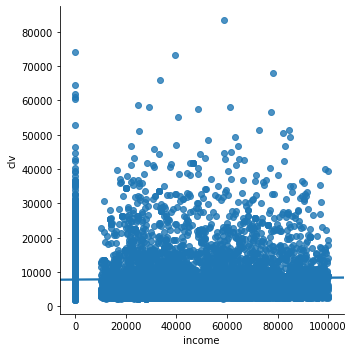

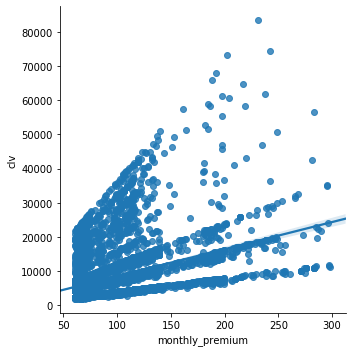

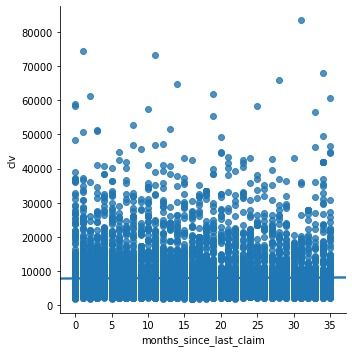

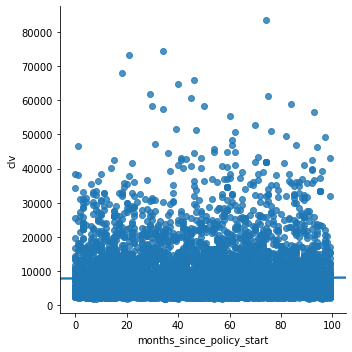

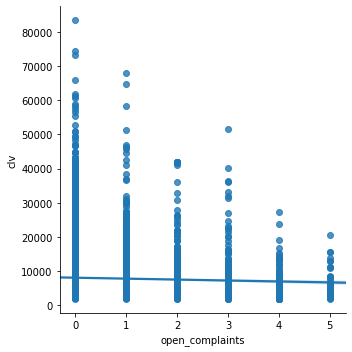

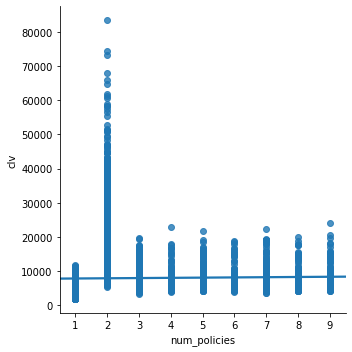

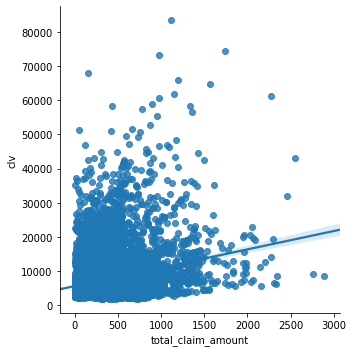

In [19]:
#cont_col = ['Customer Lifetime Value', 'Income', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']

for col in insurance_cont.columns:
    sns.lmplot(x=col, y="clv", data=insurance)

# 2.0 Linear Regression

In [20]:
#Using dmatrices, automatically encodes dummies

#Below didn't work, I don't think dmatrices will take a df
#dy = insurance['Customer Lifetime Value']
#dX = insurance.drop(columns=['Customer', 'Effective To Date', 'Customer Lifetime Value'])


y, X = dmatrices('clv ~ state + coverage_type + education + employment_status + gender + income + location_code + marital_status + monthly_premium + months_since_last_claim + months_since_policy_start + open_complaints + num_policies + sales_channel + vehicle_class + vehicle_size',
                 data=insurance, return_type='dataframe')
#If using pd dummies above
#X = reg_df.drop(columns=['clv'])
#y = reg_df['clv']

## fit a OLS model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

#Low Rsquared at 0.16, only 16% of variance explained by model
#very low p value for omnibus and JB test suggests non-normal distribution


/Applications/Python3.7/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    clv   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     50.95
Date:                Wed, 01 Apr 2020   Prob (F-statistic):          7.11e-321
Time:                        18:16:32   Log-Likelihood:                -92842.
No. Observations:                9134   AIC:                         1.858e+05
Df Residuals:                    9098   BIC:                         1.860e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            838.2699    821.117      1.021      0.307    -771.304    2447.844
state[T.California]                   31.0556    189.546      0.164      0.870    -340.498     402.609
state[T.Nevada]                       32.1899    261.701      0.123      0.902    -480.804     545.184
state[T.Oregon]                       82.4450    196.438      0.420      0.675    -302.617     467.507
state[T.Washington]                  183.4090    270.520      0.678      0.498    -346.872     713.690
coverage_type[T.Extended]            140.3589    249.586      0.562      0.574    -348.886     629.604
coverage_type[T.Premium]             190.2135    527.925      0.360      0.719    -844.638    1225.065
education[T.College]                 -24.7728    171.457     -0.144      0.885    -360.867     311.321
education[T.Doctor]                 -343.4858    363.013     -0.946      0.344   -1055.073     368.101
education[T.High School or Below]    308.6487    173.202      1.782      0.075     -30.866     648.163
education[T.Master]                   95.1637    263.090      0.362      0.718    -420.553     610.880
employment_status[T.Employed]        522.5137    354.043      1.476      0.140    -171.490    1216.517
employment_status[T.Medical Leave]   172.6736    436.815      0.395      0.693    -683.582    1028.930
employment_status[T.Retired]         -57.9088    492.861     -0.117      0.906   -1024.027     908.209
employment_status[T.Unemployed]     -103.3627    356.194     -0.290      0.772    -801.583     594.858
gender[T.M]                         -193.0864    132.884     -1.453      0.146    -453.568      67.396
location_code[T.Suburban]           -210.1066    192.315     -1.093      0.275    -587.087     166.874
location_code[T.Urban]               102.3951    218.096      0.469      0.639    -325.121     529.911
marital_status[T.Married]           -312.3274    193.137     -1.617      0.106    -690.920      66.265
marital_status[T.Single]            -514.7813    223.676     -2.301      0.021    -953.237     -76.325
sales_channel[T.Branch]              181.6350    164.395      1.105      0.269    -140.617     503.887
sales_channel[T.Call Center]         206.6523    184.797      1.118      0.263    -155.591     568.896
sales_channel[T.Web]                -135.5028    203.708     -0.665      0.506    -534.816     263.811
vehicle_class[T.Luxury Car]         1257.7803   1386.474      0.907      0.364   -1460.021    3975.582
vehicle_class[T.Luxury SUV]         1248.9855   1374.161      0.909      0.363   -1444.679    3942.650
vehicle_class[T.SUV]                 917.2911    457.174      2.006      0.045      21.126    1813.456
vehicle_class[T.Sports Car]         1105.1943    526.540      2.099      0.036      73.057    21

Text(0, 0.5, 'Residuals')

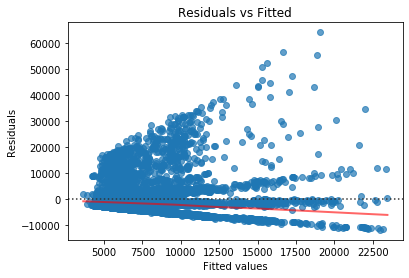

In [21]:
#diagnostic plots in python: https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/
model_fitted_y = model.fittedvalues
# model residuals
model_residuals = model.resid
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, insurance.clv, data=insurance,
                          lowess=True,
                          scatter_kws={'alpha': 0.7},
                          line_kws={'color': 'red', 'lw': 2, 'alpha': 0.6})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

#not equal variance, appears heteroskedastic

In [22]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model_residuals, model.model.exog)
lzip(name, test)

#highlight significant results further suggest heteroskedasticity

[('Lagrange multiplier statistic', 543.0311825980256),
 ('p-value', 2.159525355282359e-92),
 ('f-value', 16.4308682899961),
 ('f p-value', 1.4020942804538328e-95)]

Text(0.5, 1.0, 'Predictions vs. Original CLV')

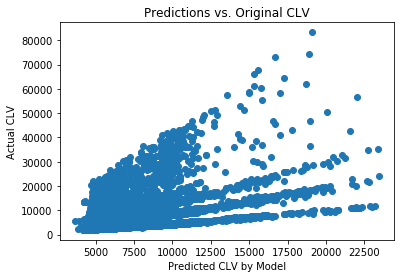

In [23]:
plt.scatter(model_fitted_y, insurance.clv)

plt.xlabel("Predicted CLV by Model")
plt.ylabel("Actual CLV")
plt.title("Predictions vs. Original CLV")
#tends to 

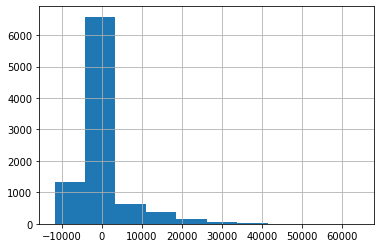

In [24]:
model_residuals.hist()
#skewed right tail

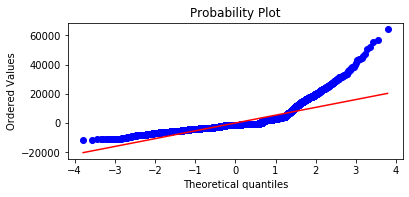

In [25]:
pred_val = model.fittedvalues.copy()
true_val = insurance['clv'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

#skewed right tailed

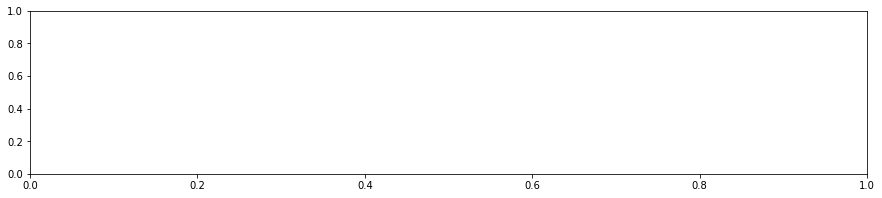

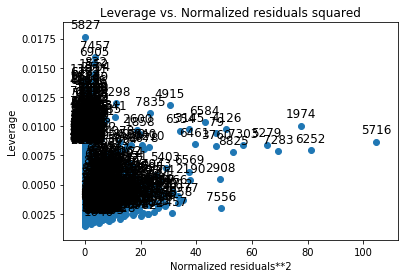

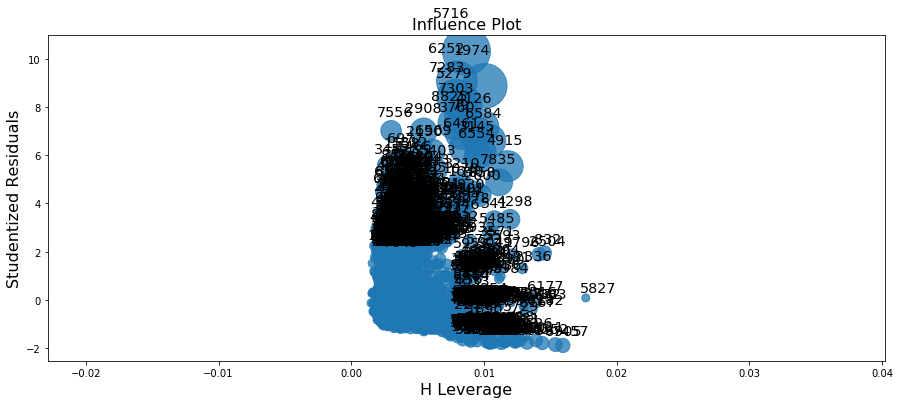

In [26]:
fig, ax = plt.subplots(figsize=(15,3))
fig = sm.graphics.plot_leverage_resid2(model, ax=ax)
fig, ax = plt.subplots(figsize=(15,6))
fig = sm.graphics.influence_plot(model, ax=ax,criterion='cooks')

In [27]:
# For each X, calculate VIF and save in dataframe (>5 is considered colinear)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)
#Monthly premium is highlight colinear with customer lifetime value. This makes sense as the more the customer pays the higher the higher the value of the customer. It seems this is not cancelled out by higher claims
#Intercept is highly colinear, this is abnormal.

VIF Factor                            features
0        155.4                           Intercept
1          1.9                 state[T.California]
2          1.4                     state[T.Nevada]
3          1.8                     state[T.Oregon]
4          1.3                 state[T.Washington]
5          3.0           coverage_type[T.Extended]
6          5.3            coverage_type[T.Premium]
7          1.4                education[T.College]
8          1.1                 education[T.Doctor]
9          1.4   education[T.High School or Below]
10         1.2                 education[T.Master]
11         6.8       employment_status[T.Employed]
12         2.0  employment_status[T.Medical Leave]
13         1.7        employment_status[T.Retired]
14         5.5     employment_status[T.Unemployed]
15         1.0                         gender[T.M]
16         2.0           location_code[T.Suburban]
17         1.6              location_code[T.Urban]
18         2.1           marital_status[T.Married]
19         2.3            marital_status[T.Single]
20         1.3             sales_channel[T.Branch]
21         1.2        sales_channel[T.Call Center]
22         1.2                sales_channel[T.Web]
23         7.8         vehicle_class[T.Luxury Car]
24         8.6         vehicle_class[T.Luxury SUV]
25         7.6                vehicle_class[T.SUV]
26         3.2         vehicle_class[T.Sports Car]
27         1.1       vehicle_class[T.Two-Door Car]
28         2.3             vehicle_size[T.Medsize]
29         2.4               vehicle_size[T.Small]
30         3.2                              income
31        25.9                     monthly_premium
32         1.0             months_since_last_claim
33         1.0           months_since_policy_start
34         1.0                     open_complaints
35         1.0                        num_policies

In [28]:
#model not improved without monthly premium
X = X.drop(columns=['monthly_premium'])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    clv   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     50.74
Date:                Wed, 01 Apr 2020   Prob (F-statistic):          2.59e-311
Time:                        18:18:55   Log-Likelihood:                -92867.
No. Observations:                9134   AIC:                         1.858e+05
Df Residuals:                    9099   BIC:                         1.861e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           5302.9998    518.703     10.224      0.000    4286.225    6319.774
state[T.California]                   47.0942    190.032      0.248      0.804    -325.411     419.600
state[T.Nevada]                       40.1574    262.389      0.153      0.878    -474.183     554.498
state[T.Oregon]                      104.6973    196.930      0.532      0.595    -281.329     490.724
state[T.Washington]                  207.7942    271.211      0.766      0.444    -323.840     739.429
coverage_type[T.Extended]           1550.8487    147.744     10.497      0.000    1261.238    1840.460
coverage_type[T.Premium]            3496.4767    236.706     14.771      0.000    3032.479    3960.474
education[T.College]                 -35.6956    171.902     -0.208      0.836    -372.661     301.270
education[T.Doctor]                 -306.0961    363.930     -0.841      0.400   -1019.482     407.289
education[T.High School or Below]    291.6102    173.641      1.679      0.093     -48.765     631.986
education[T.Master]                  115.7511    263.767      0.439      0.661    -401.292     632.794
employment_status[T.Employed]        546.2369    354.960      1.539      0.124    -149.564    1242.037
employment_status[T.Medical Leave]   206.0497    437.940      0.470      0.638    -652.412    1064.511
employment_status[T.Retired]         -65.7460    494.159     -0.133      0.894   -1034.408     902.916
employment_status[T.Unemployed]      -89.6119    357.128     -0.251      0.802    -789.662     610.438
gender[T.M]                         -223.2056    133.164     -1.676      0.094    -484.237      37.826
location_code[T.Suburban]           -183.5462    192.784     -0.952      0.341    -561.447     194.354
location_code[T.Urban]               102.0638    218.670      0.467      0.641    -326.579     530.707
marital_status[T.Married]           -341.8217    193.600     -1.766      0.077    -721.322      37.678
marital_status[T.Single]            -543.9177    224.227     -2.426      0.015    -983.453    -104.382
sales_channel[T.Branch]              182.3564    164.829      1.106      0.269    -140.745     505.458
sales_channel[T.Call Center]         221.6343    185.272      1.196      0.232    -141.539     584.808
sales_channel[T.Web]                -135.8095    204.245     -0.665      0.506    -536.175     264.556
vehicle_class[T.Luxury Car]          1.03e+04    504.869     20.407      0.000    9313.189    1.13e+04
vehicle_class[T.Luxury SUV]         1.028e+04    475.928     21.597      0.000    9345.512    1.12e+04
vehicle_class[T.SUV]                3872.7893    176.076     21.995      0.000    3527.641    4217.938
vehicle_class[T.Sports Car]         4126.9773    302.448     13.645      0.000    3534.111    47

In [29]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor                            features
0         61.7                           Intercept
1          1.9                 state[T.California]
2          1.4                     state[T.Nevada]
3          1.8                     state[T.Oregon]
4          1.3                 state[T.Washington]
5          1.1           coverage_type[T.Extended]
6          1.1            coverage_type[T.Premium]
7          1.4                education[T.College]
8          1.1                 education[T.Doctor]
9          1.4   education[T.High School or Below]
10         1.2                 education[T.Master]
11         6.8       employment_status[T.Employed]
12         2.0  employment_status[T.Medical Leave]
13         1.7        employment_status[T.Retired]
14         5.5     employment_status[T.Unemployed]
15         1.0                         gender[T.M]
16         2.0           location_code[T.Suburban]
17         1.6              location_code[T.Urban]
18         2.1           marital_status[T.Married]
19         2.3            marital_status[T.Single]
20         1.3             sales_channel[T.Branch]
21         1.2        sales_channel[T.Call Center]
22         1.2                sales_channel[T.Web]
23         1.0         vehicle_class[T.Luxury Car]
24         1.0         vehicle_class[T.Luxury SUV]
25         1.1                vehicle_class[T.SUV]
26         1.1         vehicle_class[T.Sports Car]
27         1.1       vehicle_class[T.Two-Door Car]
28         2.3             vehicle_size[T.Medsize]
29         2.3               vehicle_size[T.Small]
30         3.2                              income
31         1.0             months_since_last_claim
32         1.0           months_since_policy_start
33         1.0                     open_complaints
34         1.0                        num_policies

In [30]:
y, X = dmatrices('clv ~ state + coverage_type + education + employment_status + gender + income + location_code + marital_status + monthly_premium + months_since_last_claim + months_since_policy_start + open_complaints + num_policies + sales_channel + vehicle_class + vehicle_size',
                 data=insurance, return_type='dataframe')
y['clv'] = np.log(y['clv']+1)
#Coudn't make formula work, probably incorrect anyways: X[['income', 'monthly_premium', 'months_since_last_claim', 'months_since_policy_start','num_policies']].apply(lambda x:np.log(x) if column.value > 0 else np.log(x),axis=1)
model_trans = sm.OLS(y, X).fit()
model_trans.summary()

#log improved R2 to 0.25 but still non-normal

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    clv   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     88.52
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:18:56   Log-Likelihood:                -7726.4
No. Observations:                9134   AIC:                         1.552e+04
Df Residuals:                    9098   BIC:                         1.578e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              7.8891      0.074    107.058      0.000       7.745       8.034
state[T.California]                    0.0113      0.017      0.663      0.507      -0.022       0.045
state[T.Nevada]                        0.0054      0.023      0.229      0.819      -0.041       0.051
state[T.Oregon]                        0.0139      0.018      0.790      0.430      -0.021       0.048
state[T.Washington]                   -0.0040      0.024     -0.166      0.868      -0.052       0.044
coverage_type[T.Extended]              0.0798      0.022      3.561      0.000       0.036       0.124
coverage_type[T.Premium]               0.1315      0.047      2.775      0.006       0.039       0.224
education[T.College]                   0.0041      0.015      0.266      0.790      -0.026       0.034
education[T.Doctor]                   -0.0456      0.033     -1.400      0.161      -0.109       0.018
education[T.High School or Below]      0.0302      0.016      1.941      0.052      -0.000       0.061
education[T.Master]                    0.0111      0.024      0.470      0.639      -0.035       0.057
employment_status[T.Employed]          0.0356      0.032      1.121      0.262      -0.027       0.098
employment_status[T.Medical Leave]    -0.0092      0.039     -0.235      0.815      -0.086       0.068
employment_status[T.Retired]          -0.0144      0.044     -0.326      0.744      -0.101       0.072
employment_status[T.Unemployed]       -0.0274      0.032     -0.856      0.392      -0.090       0.035
gender[T.M]                           -0.0163      0.012     -1.369      0.171      -0.040       0.007
location_code[T.Suburban]             -0.0231      0.017     -1.338      0.181      -0.057       0.011
location_code[T.Urban]                 0.0067      0.020      0.341      0.733      -0.032       0.045
marital_status[T.Married]             -0.0245      0.017     -1.413      0.158      -0.058       0.009
marital_status[T.Single]              -0.0559      0.020     -2.784      0.005      -0.095      -0.017
sales_channel[T.Branch]                0.0033      0.015      0.226      0.821      -0.026       0.032
sales_channel[T.Call Center]           0.0062      0.017      0.375      0.708      -0.026       0.039
sales_channel[T.Web]                  -0.0345      0.018     -1.888      0.059      -0.070       0.001
vehicle_class[T.Luxury Car]            0.1017      0.124      0.818      0.414      -0.142       0.346
vehicle_class[T.Luxury SUV]            0.0832      0.123      0.675      0.500      -0.159       0.325
vehicle_class[T.SUV]                   0.1908      0.041      4.650      0.000       0.110       0.271
vehicle_class[T.Sports Car]            0.1895      0.047      4.010      0.000       0.097      

Text(0, 0.5, 'Residuals')

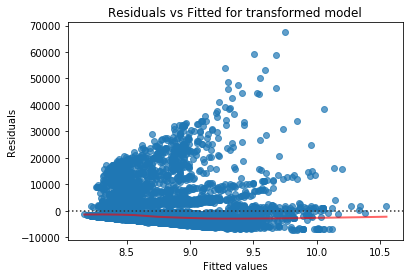

In [31]:
model_trans_fitted_y = model_trans.fittedvalues
# model residuals
model_trans_residuals = model_trans.resid
# normalized residuals
model_trans_norm_residuals = model_trans.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_trans_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_trans_norm_residuals))
# absolute residuals
model_trans_abs_resid = np.abs(model_trans_residuals)
# leverage, from statsmodels internals
model_trans_leverage = model_trans.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_trans_cooks = model_trans.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_trans_fitted_y, insurance.clv, data=insurance,
                          lowess=True,
                          scatter_kws={'alpha': 0.7},
                          line_kws={'color': 'red', 'lw': 2, 'alpha': 0.6})

plot_lm_1.axes[0].set_title('Residuals vs Fitted for transformed model')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

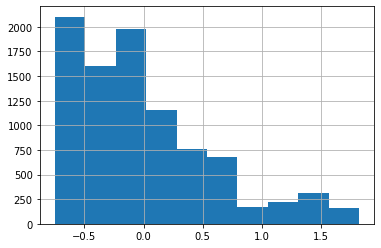

In [32]:
model_trans_residuals.hist()
#skewed right tail

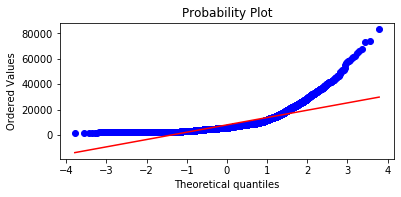

In [33]:
pred_val = model_trans.fittedvalues.copy()
true_val = insurance['clv'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

#skewed right tailed

In [34]:
#model by forward selection

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included, model.summary()

result = stepwise_selection(X, y)

print('resulting features:')
print(result)
#no predictive improvement with reduced model...

Add  monthly_premium                with p-value 0.0
Add  Intercept                      with p-value 0.0
Add  num_policies                   with p-value 4.04185e-104
Add  vehicle_class[T.SUV]           with p-value 1.41025e-13
Add  employment_status[T.Employed]  with p-value 1.9154e-10
Add  vehicle_class[T.Sports Car]    with p-value 5.01899e-07
Add  open_complaints                with p-value 1.49012e-05
Add  coverage_type[T.Extended]      with p-value 0.000356354
Add  coverage_type[T.Premium]       with p-value 2.54281e-05
Add  marital_status[T.Single]       with p-value 0.00378064
Add  sales_channel[T.Web]           with p-value 0.0366482
resulting features:
(['monthly_premium', 'Intercept', 'num_policies', 'vehicle_class[T.SUV]', 'employment_status[T.Employed]', 'vehicle_class[T.Sports Car]', 'open_complaints', 'coverage_type[T.Extended]', 'coverage_type[T.Premium]', 'marital_status[T.Single]', 'sales_channel[T.Web]'], <class 'statsmodels.iolib.summary.Summary'>
"""
             

In [35]:
z, D = dmatrices('total_claim_amount ~ state + coverage_type + education + employment_status + gender + income +location_code + marital_status  + months_since_last_claim + months_since_policy_start + open_complaints + num_policies + sales_channel + vehicle_class + vehicle_size',
                 data= df_work,
                 return_type='dataframe')

NameError: name 'df_work' is not defined

In [ ]:
# Fit model - considering all the variables 
MLR = sm.OLS(z,D).fit()

# Summarize model
MLR.summary()

# 3: Logistic Regression

#### 0.0: Library Setup

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/jgoodz8/3251_Project_Group2/master/AutoInsurance.csv')

data.columns = ['customer', 'state', 'clv', 'response', 'coverage_type', 'education', 'effective_to_date',\
                'employment_status', 'gender', 'income' , 'location_code', 'marital_status', 'monthly_premium',\
                'months_since_last_claim', 'months_since_policy_start', 'open_complaints', 'num_policies',\
                'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',\
                'vehicle_class', 'vehicle_size']

## Allows us to display all the columns in one go
pd.options.display.max_columns = None
data.head(5)

## 1: Define the problem

### 1.0 **Goal**:   
Using Logistic regression, Predict the response received through the marketing campaign.  
- ['Response'] = Yes/No

Using the following variables
1. ['renew_offer_type']
2. ['sales_channel']
3. ['gender']
4. ['income']
5. ['monthly_premium']

#### Assumptions:
- Variables were picked based on intuition (i.e assuming that Monthly Premiums are more likely to influence renewal as opposed to the gender variable.


### 1.1 Numeric Variables  
A basic histogram which showcase the 'distribution' of what the numeric variables look like

In [ ]:
num_vars= ['monthly_premium','income']
data[num_vars].hist(figsize=(10,6))
plt.show()

### 1.2 Categorical Variables
A basic visualization of the distribution and counts of different options in the categorical fields.

In [ ]:
cat_vars = ['employment_status', 'gender', 'sales_channel', 'renew_offer_type']

sns.catplot('renew_offer_type',kind="count",data=data)
sns.catplot('sales_channel',kind="count",data=data)
sns.catplot('gender',kind="count",data=data)
sns.catplot('employment_status',kind="count",data=data)
plt.show()

### 1.3 Response Variable
A basic visualization of the distribution and counts of the Response variable

In [ ]:
sns.catplot('response',kind="count",data=data)

plt.show()

#### Concern:
We can see that we have a class imbalance.
~80% of the response variable is a 'No'.  
By 'cheating' we can claim to achieve ~80% accuracy of our model by simply setting all of the responses to 'No'.

In order to avoid this bias, We'll use SMOTE **(Synthetic minority oversampling technique)** to oversample the "Yes" response in the training data.

### 2: Transformations

#### 2.1 Convert Categorical variables into binary variables in order for the logistic model to utilize them


In [ ]:
data_cat= pd.get_dummies(data[cat_vars])

#### 2.2 Merge with the selected numeric variables to create a combined datamart

In [ ]:
data_final = data[num_vars].join(data_cat)

#### 2.3 Convert the ['response'] = Yes/No variable into a binary [0,1] response variable

In [ ]:
data_final['binary_response'] = np.where(data['response']=="Yes",1,0)
data_final.head(3)

### 3: Modelling

#### 3.1 For simplification, we use:  
X= Predictors  
y= Response

In [ ]:
X = data_final.loc[:, data_final.columns != 'binary_response']
y = data_final.loc[:, data_final.columns == 'binary_response']


#### 3.2 Split into train and test.

In [ ]:
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 3.3 SMOTE 
As discussed in 1.3, use SMOTE (Synthetic minority oversampling technique) to oversample the "Yes" response in the training data

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
columns = X_train.columns
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y = pd.DataFrame(data=os_data_y,columns=['binary_response'])

## Check the data
print("OS data length ",len(os_data_X))
print("OS 'No' response ", len(os_data_y[os_data_y['binary_response']==0]))
print("OS 'Yes' response ", len(os_data_y[os_data_y['binary_response']==1]))

#### 3.4 Train and fit the model

In [ ]:
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

In [ ]:
os_data_y = np.ravel(os_data_y)
X_train = os_data_X
y_train = os_data_y
model = Logit(y_train,X_train)
model=model.fit(maxiter=100)

print(model.summary2())

**Conclusion:**  
Based on the model summary,
The following can be concluded:  
1. The variables ['income'] and ['monthly_premium'] have absolutely no effect on the probability of a response from a marketing campaign.  


2. ['renew_offer_type_Offer4'] has the strongest negative correlation with the response.


3. ['employment_status_Retired'] has the strongest positive correlation with a response.

#### 3.5 Run the model and create the confusion matrix  

Derive the binary estimates $\hat{y}$ of the response $y$.  
  A decision boundary of **0.5** has been used, i.e A threshold value above which the value is classified as 1 and below it it classified as 0.   

**To summarize**:  
p >= 0.5, $\hat{y}$ = 1  
p <  0.5,   $\hat{y}$ = 0

In [ ]:
def predict(df,thresh=0.5):
    y_hat_prob= model.predict(df)
    y_hat=(y_hat_prob >= thresh) * 1
    
    return y_hat

y_hat= predict(X_test)
cnf_matrix=metrics.confusion_matrix(y_hat,y_test)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=10,fontsize=18)
plt.ylabel('Actual label',fontsize=18)
plt.xlabel('Predicted label',fontsize=18)

#### 3.6 Run classification report.  

**Precision**: The ability of the classifier NOT to label as positive a sample that is negative.  
**Recall**: The ability of the classifier to find all the positive samples.

From the report below we can see that recall is 70%.  This means that out of all the customers that responded "Yes", we managed to label 70% of them correctly using the predictor variables we selected.  

Precision average is also high at 82%

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

#### 3.7 Plotting the Receiver Operating Characteristic (ROC) curve

We can see that the Area Under the Curve (AUC) is 0.68 which means that the model is correctly predicting the customers' response approx 70% of the time.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### 4: Model Improvement
We examine the relationship between threshold and precision of the model


In [ ]:
## Returns the accuracy of the true positive

def true_pos(cm):
    num= cm.iloc[1,1]
    denom = np.sum(np.sum(cm))
    out= num/denom
    
    return out

def accuracy(predicted,actual):
    
    diff= predicted - actual
    total = len(diff)
    incorrect= np.count_nonzero(diff)
    
    result= (total - incorrect) / total
    
    return result



decision_boundaries= np.arange(0,1,0.01)
accuracies=[]
db=[]
for i in range(len(decision_boundaries)):
    try:
        p= decision_boundaries[i]
        y_hat= predict(X_test,thresh=p)
        cm= pd.crosstab(y_hat,y_test)
        
        accuracies.append(true_pos(cm))
        db.append(p)
        
    
    except:
        pass

accuracies_2=[]
for i in range(len(decision_boundaries)):
    p = decision_boundaries[i]
    y_hat= predict(X_test,thresh=p)
    accuracies_2.append(accuracy(y_hat,y_test))
    
plt.figure(figsize=(10,6))

plt.plot(decision_boundaries,accuracies_2)
plt.plot(db,accuracies)
plt.xlabel('Boundary Threshold',fontsize=12)
plt.ylabel('Model Accuracy in %',fontsize=12)
#plt.axvline(0.23, color='red')
plt.legend(('Overall Model accuracy','True Positive accuracy','Optimum Point'),fontsize=12)
plt.show()
    

**Conclusion:**  
This graph visualizes an interesting tradeoff.   
As we increase the boundary threshold, we increase the overall model accuracy at the expense of True positive accuracy. 

Although no ideal optimum points exist (we used a **0.5** threshold previously), we can use this as a guideline to fine tune our desired outcome.

### EOF - Thank you